# IHLT Lab 4: Part of Speech

**Authors:** *Zachary Parent ([zachary.parent](mailto:zachary.parent@estudiantat.upc.edu)), Carlos Jiménez ([carlos.humberto.jimenez](mailto:carlos.humberto.jimenez@estudiantat.upc.edu))*

### 2024-10-10

**Instructions:**

1. Consider Treebank corpus.

    - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.

    - Evaluate the resulting 24 models using sentences from 3001.

2. Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).

    - Which model would you select? Justify the answer.


## Notes

- we should measure the time it takes to train each model.

- we could also measure the time it takes to make inferences on the test set

- we should plot the accuracy vs the number of sentences.

- we could create a ratio of accuracy vs training time for each model.

- we could optionally tweak the feature func for CRFTagger


In [1]:
import pandas as pd
import time
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/zachparent/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [2]:
nltk.corpus.treebank.tagged_sents()[1]

[('Mr.', 'NNP'),
 ('Vinken', 'NNP'),
 ('is', 'VBZ'),
 ('chairman', 'NN'),
 ('of', 'IN'),
 ('Elsevier', 'NNP'),
 ('N.V.', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('Dutch', 'NNP'),
 ('publishing', 'VBG'),
 ('group', 'NN'),
 ('.', '.')]

In [3]:
## Learning the model

def hidden_markov(train, test):
    def LID(fd, bins):
        return nltk.probability.LidstoneProbDist(fd, 0.1, bins)
    
    trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
    HMM = trainer.train_supervised(train, estimator=LID)
    return HMM

## TnT

In [4]:

def TnT(train, test):
    TnT = nltk.tag.tnt.TnT()
    TnT.train(train)

    return TnT

# Perceptron

In [5]:
def perceptron(train, test):
    PER = nltk.tag.perceptron.PerceptronTagger(load=False)
    PER.train(train)
    
    return PER
# PER.tag(['the', 'men', 'attended', 'to', 'the', 'meetings']) 

# CRF

In [6]:
def CRF(train, test):
    CRF = nltk.tag.CRFTagger()
    CRF.train(train,'crf_tagger_model')
    
    return CRF
    # CRF.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

## Train all models with different sentences number

In [7]:
# Sentences number list
sentences_n = [500, 1000, 1500, 2000, 2500, 3000]
# TODO:remove
sentences_n = [s//10 for s in sentences_n]

In [8]:
test = nltk.corpus.treebank.tagged_sents()[3000:]

accuracy_results = pd.DataFrame(columns=['HMM', 'TnT', 'PER', 'CRF'], index=sentences_n, dtype=float)
training_time_results = pd.DataFrame(columns=['HMM', 'TnT', 'PER', 'CRF'], index=sentences_n, dtype=float)
inference_time_results = pd.DataFrame(columns=['HMM', 'TnT', 'PER', 'CRF'], index=sentences_n, dtype=float)

for n in sentences_n:
    print()
    print(f'\033[1mTraining with {n} sentences...\033[0m')
    for model in [('HMM', hidden_markov), ('TnT', TnT), ('PER', perceptron), ('CRF', CRF)]:
        print()
        print(f'\t\033[1mTraining {model[0]}...\033[0m')
    
        train = nltk.corpus.treebank.tagged_sents()[:n]
        
        start_training_time = time.time()
        trained_model = model[1](train, test)
        end_training_time = time.time()
        training_time_results.loc[n, model[0]] = end_training_time - start_training_time

        start_inference_time = time.time()
        accuracy_results.loc[n, model[0]] = trained_model.accuracy(test)
        end_inference_time = time.time()
        inference_time_results.loc[n, model[0]] = end_inference_time - start_inference_time

        print(pd.DataFrame([
            accuracy_results.loc[n, model[0]],
            training_time_results.loc[n, model[0]],
            inference_time_results.loc[n, model[0]]
        ], index=['Accuracy', 'Training time', 'Inference time']).to_string(col_space=15, ))





Training with 50 sentences...

	Training HMM...
                              0
Accuracy               0.595683
Training time          0.000910
Inference time         1.528819

	Training TnT...
                              0
Accuracy               0.520181
Training time          0.002947
Inference time         0.205233

	Training PER...
                              0
Accuracy               0.723548
Training time          0.119871
Inference time         0.519319

	Training CRF...
                              0
Accuracy               0.749320
Training time          0.058077
Inference time         0.223174

Training with 100 sentences...

	Training HMM...
                              0
Accuracy               0.673818
Training time          0.009460
Inference time         1.497592

	Training TnT...
                              0
Accuracy               0.587222
Training time          0.013703
Inference time         0.212891

	Training PER...
                              0
Accuracy   

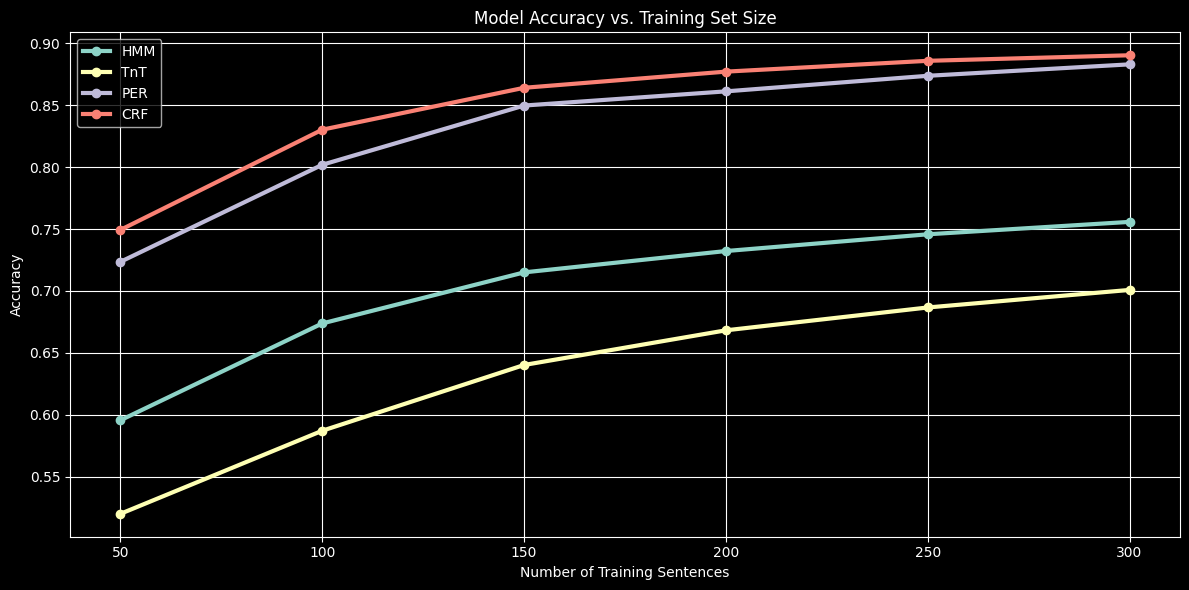

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for model in accuracy_results.columns:
    plt.plot(sentences_n, accuracy_results[model], marker='o', label=model, linewidth=3)

plt.xlabel('Number of Training Sentences')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


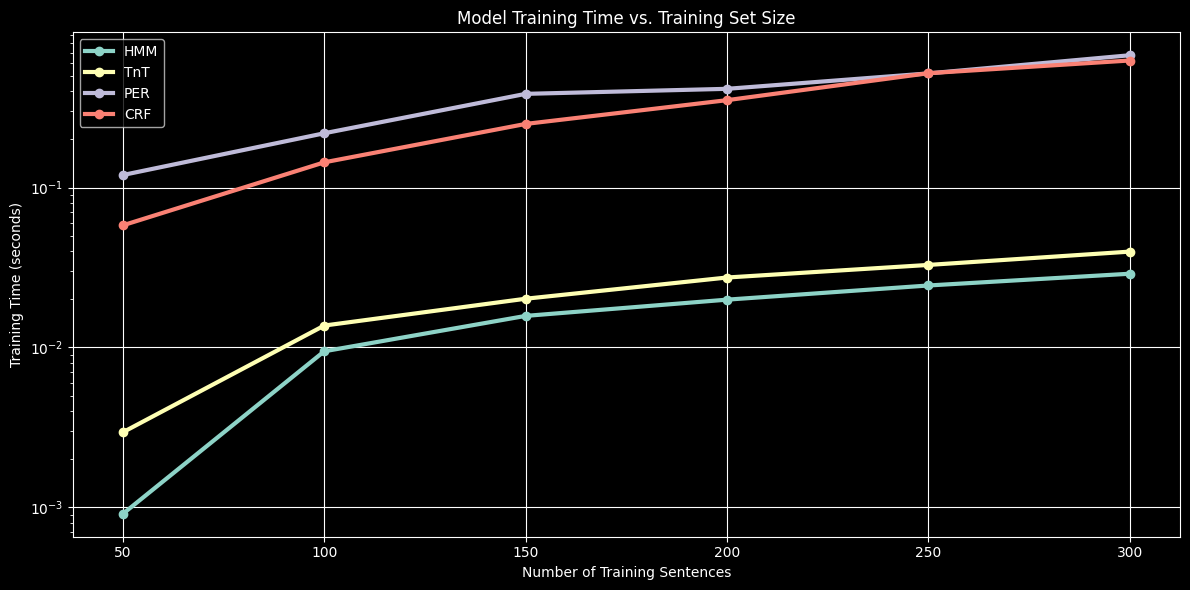

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for model in training_time_results.columns:
    plt.plot(sentences_n, training_time_results[model], marker='o', label=model, linewidth=3)

plt.xlabel('Number of Training Sentences')
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Time vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Using log scale for better visualization of time differences
plt.tight_layout()
plt.show()

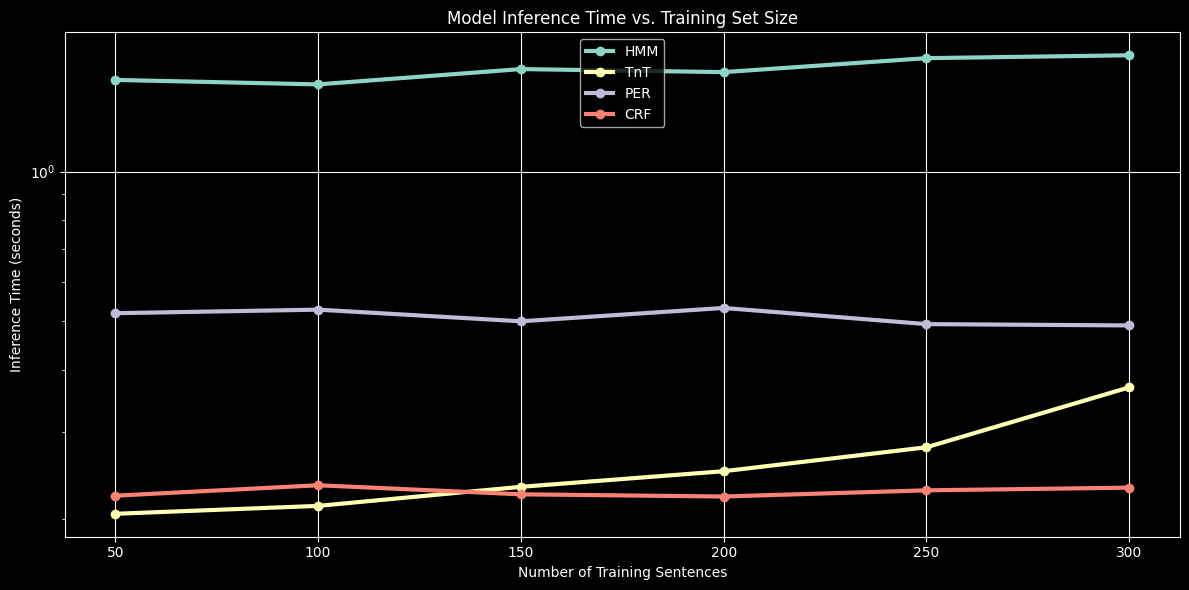

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for model in inference_time_results.columns:
    plt.plot(sentences_n, inference_time_results[model], marker='o', label=model, linewidth=3)

plt.xlabel('Number of Training Sentences')
plt.ylabel('Inference Time (seconds)')
plt.title('Model Inference Time vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Using log scale for better visualization of time differences
plt.tight_layout()
plt.show()


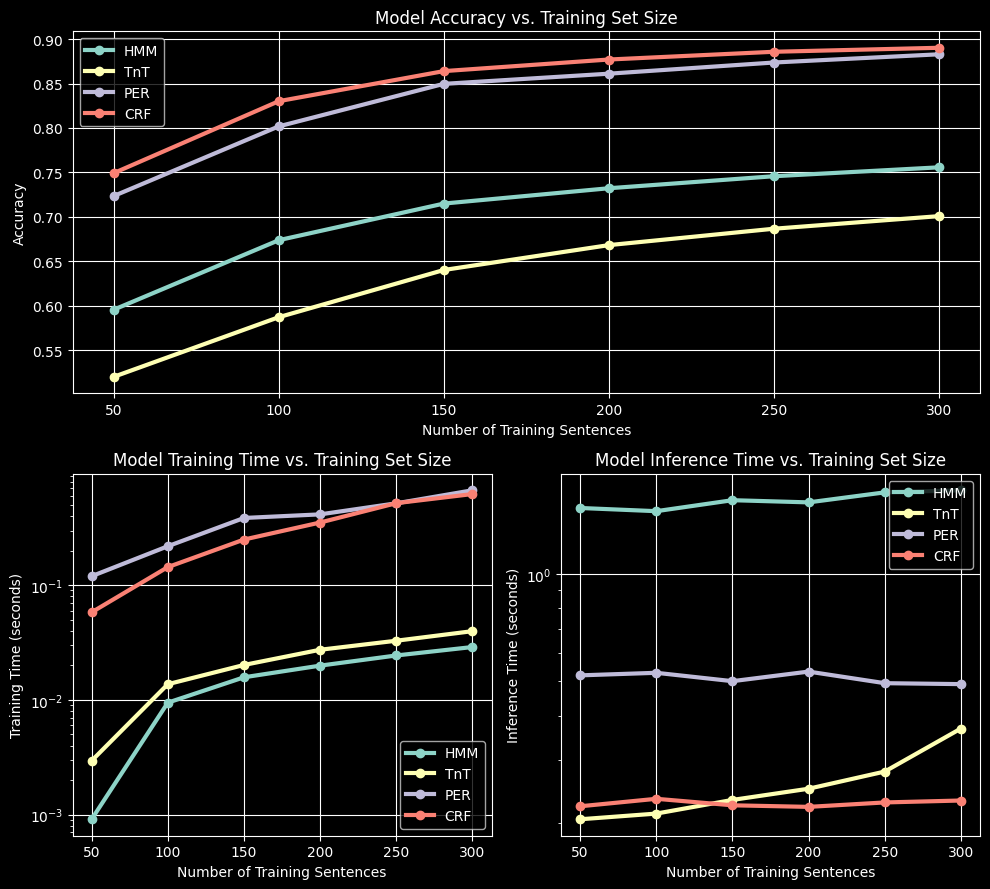

In [12]:
import matplotlib.pyplot as plt

# Define the layout using mosaic
mosaic = [
    ['accuracy', 'accuracy'],
    ['training', 'inference']
]

# Create a figure with the defined mosaic layout
fig, axd = plt.subplot_mosaic(mosaic, figsize=(10, 9))

# Accuracy plot (top row, spanning both columns)
for model in accuracy_results.columns:
    axd['accuracy'].plot(sentences_n, accuracy_results[model], marker='o', markersize=6, label=model, linewidth=3)
axd['accuracy'].set_xlabel('Number of Training Sentences')
axd['accuracy'].set_ylabel('Accuracy')
axd['accuracy'].set_title('Model Accuracy vs. Training Set Size')
axd['accuracy'].legend()
axd['accuracy'].grid(True)

# Training Time plot (bottom left)
for model in training_time_results.columns:
    axd['training'].plot(sentences_n, training_time_results[model], marker='o', markersize=6, label=model, linewidth=3)
axd['training'].set_xlabel('Number of Training Sentences')
axd['training'].set_ylabel('Training Time (seconds)')
axd['training'].set_title('Model Training Time vs. Training Set Size')
axd['training'].legend()
axd['training'].grid(True)
axd['training'].set_yscale('log')

# Inference Time plot (bottom right)
for model in inference_time_results.columns:
    axd['inference'].plot(sentences_n, inference_time_results[model], marker='o', markersize=6, label=model, linewidth=3)
axd['inference'].set_xlabel('Number of Training Sentences')
axd['inference'].set_ylabel('Inference Time (seconds)')
axd['inference'].set_title('Model Inference Time vs. Training Set Size')
axd['inference'].legend()
axd['inference'].grid(True)
axd['inference'].set_yscale('log')

plt.tight_layout()
plt.show()


# Summary & Conclusions


## Summary
#### In this lab we used 4 different part-of-speech tagging models (Hidden Markov, TnT, Perceptron and CRF) using the Treebank corpus as dataset
#### In order to evaluate and compare them, we trained all the models utilizing different sizes for training dataset and plotted 
#### We performed 3 different tests and got the results described as follows:

    1. Train data size vs Accuracy
        - The plot clearly shows that there is a positivie proportional relation between the number of training samples and the accuracy of the models.
        - The `CRF` tagger outperforms the rest of the models in terms of accuracy.

    2. Train data size vs Training time
        - The plot clearly shows that there is a positive proportional relation between the number of training samples and the training of the models.
        - The `Perceptron` tagger outperforms in most of the cases the other models, however the `CRF` tagger obtained a similar performance when the training size increased.

    3. Train data size vs Inference time
        - The plot clearly shows that there is a positivie relation between the number of training samples and the inference time of the models. (??check)
        - The `Hidden Markov Models` tagger outperforms the rest of the models, this might be the case because it is a lighter model compared to the other ones.
    
    
## Takeaway of the results

### The number of training samples have a positive impact in the performance of the tagging models
We cannot state that there is a 'best' model for part-of-speech tagging, it will all come down to the specific goal that we have in mind (i.e., inference time, accuracy, etc)
